# **Import the libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

# **Load the Dataset**

In [ ]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# **Preprocessing**

**Boxplot for Outliers**

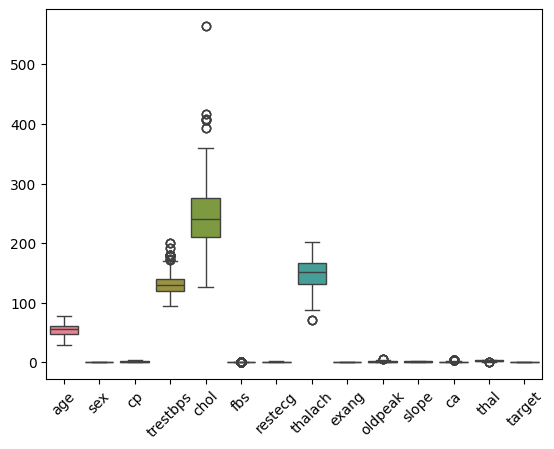

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset)

plt.xticks(rotation=45)
plt.show()

**Quartile method for Outliers Removal**

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

dataset = dataset.apply(lambda x: np.where(x < lowerbound[x.name], lowerbound[x.name],
                                           np.where(x > upperbound[x.name], upperbound[x.name], x)))

# **Split the dataset**

---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

# **Pipeline**

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
model = xgb.XGBClassifier()

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('model', model)
    ])

# **Hyperparameter Tuning**

---



In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 6, 8],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__alpha': [0, 0.1, 1],
    'model__lambda': [0, 0.1, 1],
    'model__min_child_weight': [5, 7, 9],
}

opt = BayesSearchCV(pipe, param_grid, cv=5, n_iter=10, scoring='roc_auc', random_state=8)

# **Train the Model**

In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('pca', PCA()),
                                        ('model',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       i...
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...))]),
              n_iter=10, random_state=8, scoring='roc_auc',
              search_spaces={'model__alpha': [0, 0.1, 1],
                             'model__lambda': [0, 0.1, 1],
                             'model__learning_rate': [0.1, 0.01, 0.001],
                             'model__max_depth': [3, 6, 8],
                             'model__min_child_weight': [5, 7, 9],
                             'model__n_estimators': [50, 100, 200]})

# **Evaluate the Model**

**ROC AUC**

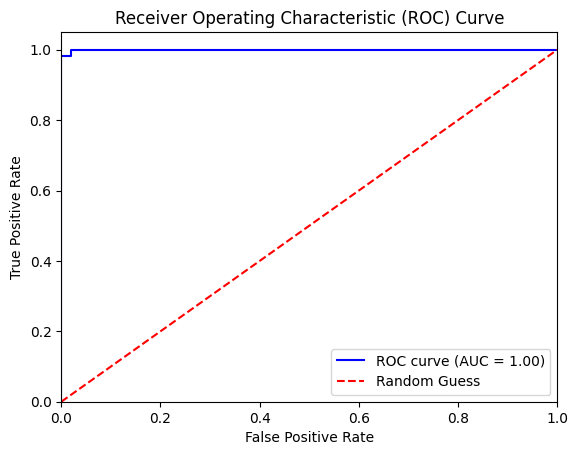

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = opt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Check for imbalance dataset**

In [ ]:
import pandas as pd

data = pd.read_csv('heart.csv')

class_counts = data['target'].value_counts()

print(class_counts)

target
1    526
0    499
Name: count, dtype: int64


**Precision - Recall Curve**

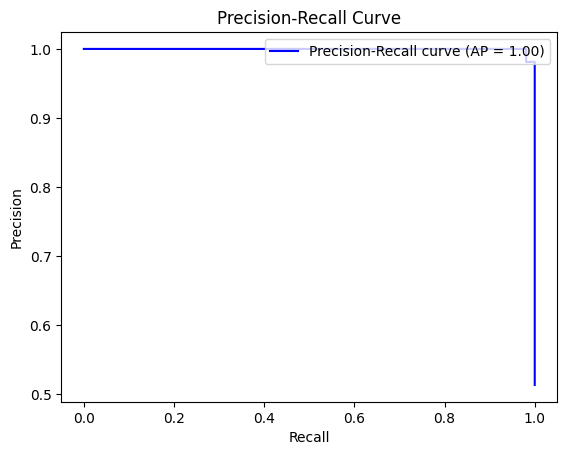

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_auc_score, classification_report

y_pred = opt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy:  0.987012987012987
F1 Score:  0.9874213836477987
Precision:  0.98125
Recall:  0.9936708860759493
[[147   3]
 [  1 157]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.98      0.99      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

ROC AUC Score:  0.9868354430379747


# **Confusion Matrix**

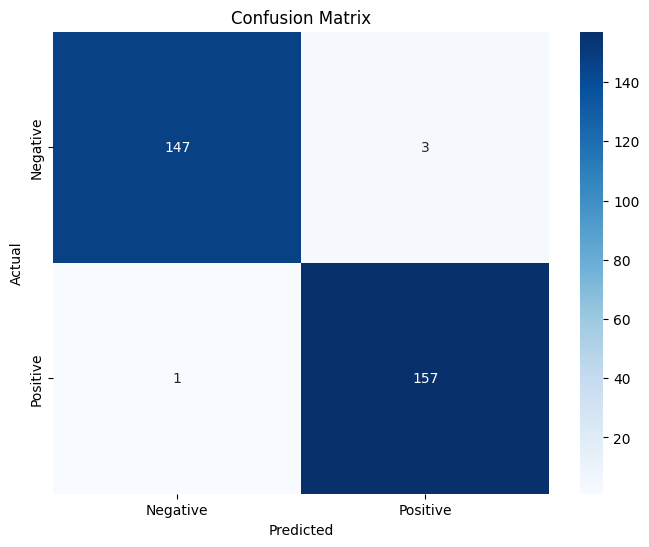

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

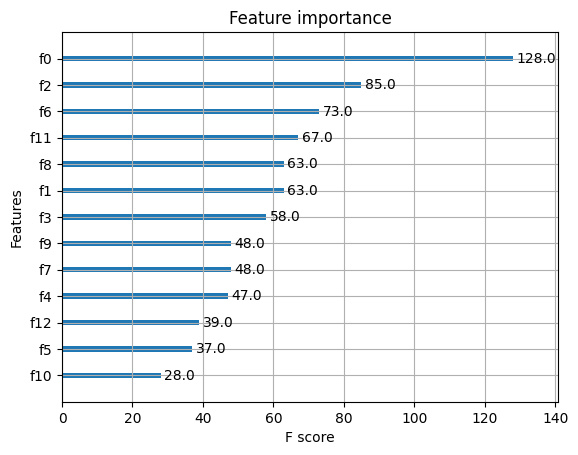

In [ ]:
from xgboost import plot_importance
plot_importance(opt.best_estimator_.named_steps['model'])
plt.show()

In [ ]:
import joblib
joblib.dump(opt, 'cdprm.pkl')

['cdprm.pkl']

# **PREDICTOR CODE**





In [ ]:
import pandas as pd
import joblib
import numpy as np
import time

model = joblib.load('cdprm.pkl')

NORMAL_HEART_RATE_MIN = 60
NORMAL_HEART_RATE_MAX = 100
MINOR_ALERT_THRESHOLD = 55
MINOR_ALERT_THRESHOLD_HIGH = 105
MAJOR_ALERT_THRESHOLD = 40
MAJOR_ALERT_THRESHOLD_HIGH = 140

def simulate_heartbeat():
    """Simulate heart rate and health data. Returns random values, with occasional spikes for testing."""
    base_heart_rate = np.random.randint(NORMAL_HEART_RATE_MIN, NORMAL_HEART_RATE_MAX + 1)
    abnormal_heart_rate = np.random.randint(MAJOR_ALERT_THRESHOLD, MAJOR_ALERT_THRESHOLD_HIGH + 1)
    return abnormal_heart_rate if np.random.rand() < 0.1 else base_heart_rate

def monitor_heartbeat():
    """Monitor heart rate and predict health risk in real-time."""
    age = int(input("Enter your age (in years): "))
    sex = int(input("Enter your sex (1 for Male, 0 for Female): "))
    cp = int(input("Enter your chest pain type (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic): "))
    trestbps = int(input("Enter your resting blood pressure (in mm Hg): "))
    chol = int(input("Enter your serum cholesterol level (in mg/dl): "))
    fbs = int(input("Enter your fasting blood sugar level (1 if > 120 mg/dl, 0 if <= 120 mg/dl): "))
    restecg = int(input("Enter your resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy): "))
    thalach = int(input("Enter your maximum heart rate achieved: "))
    exang = int(input("Enter if you have exercise-induced angina (1 for Yes, 0 for No): "))
    oldpeak = float(input("Enter your ST depression induced by exercise relative to rest (e.g., 1.4): "))
    slope = int(input("Enter the slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping): "))
    ca = int(input("Enter the number of major vessels colored by fluoroscopy (0-3): "))
    thal = int(input("Enter your thalassemia type (0: Normal, 1: Fixed Defect, 2: Reversible Defect): "))

    user_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    })

    prediction = model.predict(user_data.values)
    probability = model.predict_proba(user_data.values)[0][1]

    if prediction[0] == 1:
        print("The model predicts that the person is at risk of heart health issues.")
        start_monitoring = True
    else:
        print("The model predicts that the person is healthy.")
        monitor_decision = input("Do you want to monitor your heartbeat? (yes/no): ").strip().lower()
        start_monitoring = monitor_decision == 'yes'

    if start_monitoring:
        print("\nMonitoring heart rate for abnormal rhythms...\n")

        abnormal_count = 0

        while True:
            thalach = simulate_heartbeat()

            print(f"Heart Rate: {thalach} bpm")

            if thalach < MINOR_ALERT_THRESHOLD or thalach > MINOR_ALERT_THRESHOLD_HIGH:
                print("Minor Alert: Heart rate is out of the normal range!")

            if thalach < MAJOR_ALERT_THRESHOLD or thalach > MAJOR_ALERT_THRESHOLD_HIGH:
                abnormal_count += 1
                print("Major Alert: Abnormal heart rate detected!")

                if abnormal_count >= 3:
                    print("Critical Alert: Prolonged abnormal heart rhythm detected. Seek medical attention immediately.")
                    break
            else:
                abnormal_count = 0

            time.sleep(1)

monitor_heartbeat()
